In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../dataset/full_dataset.csv', encoding="UTF-8", delimiter = ';')

In [3]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Time of year,Time of day,Weekday,Accident cause,Weather,Latitude,Longitude,Veicule age,Victim age,Victim gender
0,0,0,340,20400,QUA,Inattentive drivers,Sol,-1.310193,-47.744564,2008.0,38.0,Masculino
1,1,1,340,20400,QUA,Inattentive drivers,Sol,-1.310193,-47.744564,2008.0,14.0,Masculino
2,2,2,360,21600,QUA,Inattentive drivers,Sol,-19.767475,-47.987255,NaN,NaN,Masculino
3,3,3,360,21600,QUA,Inattentive drivers,Nublado,-10.320021,-39.064252,2015.0,64.0,Masculino
4,4,4,608,36480,QUA,Dangerous drivers,Sol,-22.856517,-45.231143,2015.0,57.0,Masculino


In [4]:
df.dropna(inplace=True)

In [5]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Time of year,Time of day,Weekday,Accident cause,Weather,Latitude,Longitude,Veicule age,Victim age,Victim gender
0,0,0,340,20400,QUA,Inattentive drivers,Sol,-1.310193,-47.744564,2008.0,38.0,Masculino
1,1,1,340,20400,QUA,Inattentive drivers,Sol,-1.310193,-47.744564,2008.0,14.0,Masculino
3,3,3,360,21600,QUA,Inattentive drivers,Nublado,-10.320021,-39.064252,2015.0,64.0,Masculino
4,4,4,608,36480,QUA,Dangerous drivers,Sol,-22.856517,-45.231143,2015.0,57.0,Masculino
5,5,5,730,43800,QUA,Inattentive drivers,Sol,-19.947864,-44.381226,2007.0,54.0,Masculino


In [6]:
x = df[['Time of year', 'Time of day', 'Weekday', 'Weather', 'Latitude', 'Longitude', 'Veicule age', 'Victim age', 'Victim gender']]
y = df['Accident cause'] 

In [7]:
x.head()

,Time of year,Time of day,Weekday,Weather,Latitude,Longitude,Veicule age,Victim age,Victim gender
0,340,20400,QUA,Sol,-1.310193,-47.744564,2008.0,38.0,Masculino
1,340,20400,QUA,Sol,-1.310193,-47.744564,2008.0,14.0,Masculino
3,360,21600,QUA,Nublado,-10.320021,-39.064252,2015.0,64.0,Masculino
4,608,36480,QUA,Sol,-22.856517,-45.231143,2015.0,57.0,Masculino
5,730,43800,QUA,Sol,-19.947864,-44.381226,2007.0,54.0,Masculino


In [8]:
y.head()

0    Inattentive drivers
1    Inattentive drivers
3    Inattentive drivers
4      Dangerous drivers
5    Inattentive drivers
Name: Accident cause, dtype: object

#### Label Enconder

In [9]:
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
encoder = defaultdict(LabelEncoder)

In [10]:
fit = df.apply(lambda x: encoder[x.name].fit_transform(x))

In [11]:
encoder

defaultdict(sklearn.preprocessing._label.LabelEncoder,
            {'Unnamed: 0': LabelEncoder(),
             'Unnamed: 0.1': LabelEncoder(),
             'Time of year': LabelEncoder(),
             'Time of day': LabelEncoder(),
             'Weekday': LabelEncoder(),
             'Accident cause': LabelEncoder(),
             'Weather': LabelEncoder(),
             'Latitude': LabelEncoder(),
             'Longitude': LabelEncoder(),
             'Veicule age': LabelEncoder(),
             'Victim age': LabelEncoder(),
             'Victim gender': LabelEncoder()})

In [12]:
import pickle
filename = 'label_encoder.sav' 
pickle.dump(encoder, open('../model/'+ filename, 'wb'))

In [13]:
x.columns

Index(['Time of year', 'Time of day', 'Weekday', 'Weather', 'Latitude',
       'Longitude', 'Veicule age', 'Victim age', 'Victim gender'],
      dtype='object')

In [14]:
x = x.iloc[ :, : ].values
x[ : ,2] = encoder['Weekday'].transform(x[ :, 2])
x[ : ,3] = encoder['Weather'].transform(x[ :, 3])
x[ : ,8] = encoder['Victim gender'].transform(x[ :, 8])


In [15]:
x

array([[340, 20400, 1, ..., 2008.0, 38.0, 2],
       [340, 20400, 1, ..., 2008.0, 14.0, 2],
       [360, 21600, 1, ..., 2015.0, 64.0, 2],
       ...,
       [481503, 32580, 5, ..., 2005.0, 46.0, 0],
       [481503, 32580, 5, ..., 2005.0, 46.0, 2],
       [481503, 32580, 5, ..., 2005.0, 36.0, 0]], dtype=object)

In [16]:
y = encoder['Accident cause'].transform(y)
y

array([4, 4, 4, ..., 4, 4, 4])

#### Balanceamento - OverSampler

In [17]:
from imblearn.over_sampling import RandomOverSampler

In [18]:
ros = RandomOverSampler(random_state=0)
X_res, y_res = ros.fit_resample(x, y)

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.3)
y_train

array([2, 3, 5, ..., 3, 3, 1])

#### Modelo

In [20]:
import xgboost as xgb

In [21]:
model = xgb.XGBClassifier()

In [22]:
eval_set = [(X_train, y_train), (X_test, y_test)]

model.fit(
    X_train, 
    y_train,
    eval_set=eval_set,
    eval_metric=["merror", "mlogloss"],
    verbose=False 
)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [23]:
pred = model.predict(X_test)

In [24]:
pred

array([5, 5, 3, ..., 2, 5, 0])

In [25]:
from sklearn.metrics import accuracy_score

print("Accuracy: {}".format(accuracy_score(y_test, pred)))

Accuracy: 0.5938158647867247


In [26]:
y_test

array([1, 5, 1, ..., 4, 5, 4])

In [27]:
result = encoder['Accident cause'].inverse_transform(y_test)

In [28]:
result

array(['Dangerous climate conditions', 'People on the road',
       'Dangerous climate conditions', ..., 'Inattentive drivers',
       'People on the road', 'Inattentive drivers'], dtype=object)

In [29]:
from matplotlib import pyplot

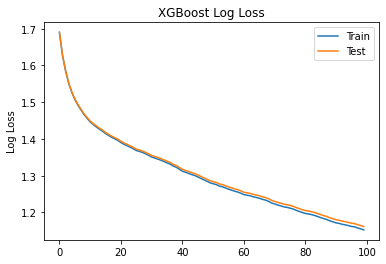

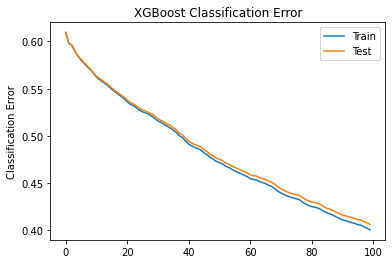

In [30]:
results = model.evals_result()
epochs = len(results['validation_0']['merror'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['mlogloss'], label='Train')
ax.plot(x_axis, results['validation_1']['mlogloss'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()
# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['merror'], label='Train')
ax.plot(x_axis, results['validation_1']['merror'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()

#### Salvando o modelo

In [31]:
import pickle

In [32]:
filename = 'xboost_model.sav' 
pickle.dump(model, open('../model/'+ filename, 'wb'))

#### Carregando o modelo

In [33]:
# model = pickle.load(open('../model/'+ filename, "rb"))

In [34]:
# encoder = pickle.load(open('../model/label_encoder.sav', "rb"))

In [35]:
df.tail()

,Unnamed: 0,Unnamed: 0.1,Time of year,Time of day,Weekday,Accident cause,Weather,Latitude,Longitude,Veicule age,Victim age,Victim gender
902458,902458,269134,481503,32580,SÁB,Inattentive drivers,Ceu Claro,-24.96363,-53.45366,2005.0,55.0,Feminino
902459,902459,269135,481503,32580,SÁB,Inattentive drivers,Ceu Claro,-24.96363,-53.45366,2005.0,25.0,Feminino
902460,902460,269136,481503,32580,SÁB,Inattentive drivers,Ceu Claro,-24.96363,-53.45366,2005.0,46.0,Feminino
902461,902461,269137,481503,32580,SÁB,Inattentive drivers,Ceu Claro,-24.96363,-53.45366,2005.0,46.0,Masculino
902462,902462,269138,481503,32580,SÁB,Inattentive drivers,Ceu Claro,-24.96363,-53.45366,2005.0,36.0,Feminino
